# Hyperparametr Tuning
- to choose a set of optimal hyperparameters for a learning algorithm
- example case: Bike Renting Analysis problem (from kaggle)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
%matplotlib inline

In [ ]:
!curl -L https://goo.gl/s8qSL5  -o ./bike_train.csv
# !curl https://goo.gl/s8qSL5  -o ../Lab_M2/data/bike_train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0

  3  643k    3 24576    0     0   8192      0  0:01:20  0:00:03  0:01:17  8192
100  643k  100  643k    0     0   160k      0  0:00:04  0:00:04 --:--:-- 2843k


In [ ]:
train = pd.read_csv("bike_train.csv")
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
train = pd.read_csv("bike_train.csv", parse_dates=["datetime"])
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
# train.shape     # (10886, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


- decompose 'datetime' feature

In [ ]:
train["d-year"] = train["datetime"].dt.year
train["d-month"] = train["datetime"].dt.month
train["d-day"] = train["datetime"].dt.day
train["d-hour"] = train["datetime"].dt.hour
train["d-minute"] = train["datetime"].dt.minute
train["d-second"] = train["datetime"].dt.second

train[["datetime", "d-year", "d-month", "d-day", "d-hour", "d-minute", "d-second"]].head()

,datetime,d-year,d-month,d-day,d-hour,d-minute,d-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


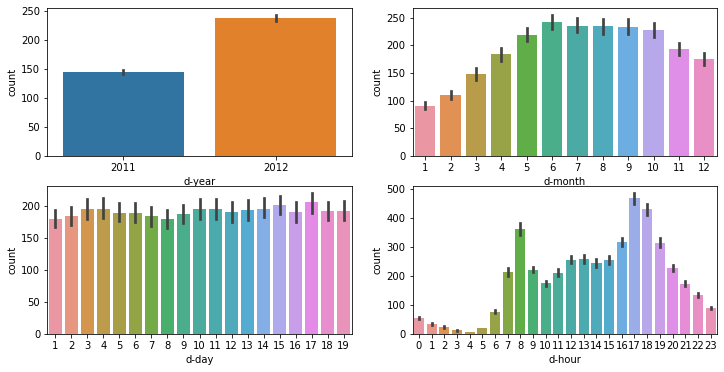

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12, 6)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)
sns.barplot(data=train, x="d-day", y="count", ax=ax3)
sns.barplot(data=train, x="d-hour", y="count", ax=ax4)

#### average numbers of rentals by hour (weekdays and weekends)
- pointplot():point estimates and confidence intervals using scatter plot
- It is important to keep in mind that a point plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

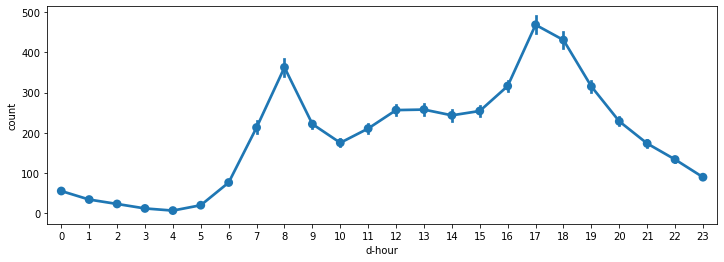

In [ ]:
plt.figure(figsize=(12,4))
# sns.pointplot(data=train, x="d-hour", y="count", hue="workingday")
sns.pointplot(data=train, x="d-hour", y="count")

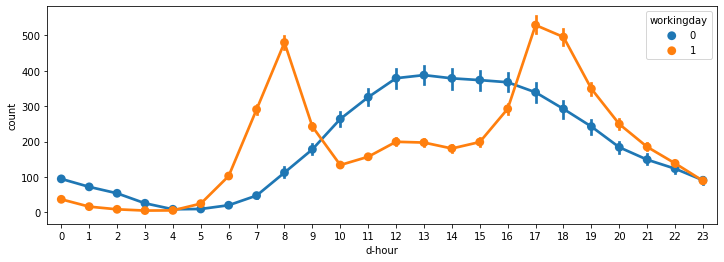

In [ ]:
plt.figure(figsize=(12,4))
sns.pointplot(data=train, x="d-hour", y="count", hue="workingday")

#### average number of rentals (weekdays)
- dayofweek: return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. This method is available on both Series with datetime values (using the dt accessor) or DatetimeIndex.

In [ ]:
train["d-dayofweek"] = train["datetime"].dt.dayofweek   # monday(0), ... sunday(6)
print(train.shape)
train[["datetime", "d-dayofweek"]].head()

(10886, 19)


,datetime,d-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


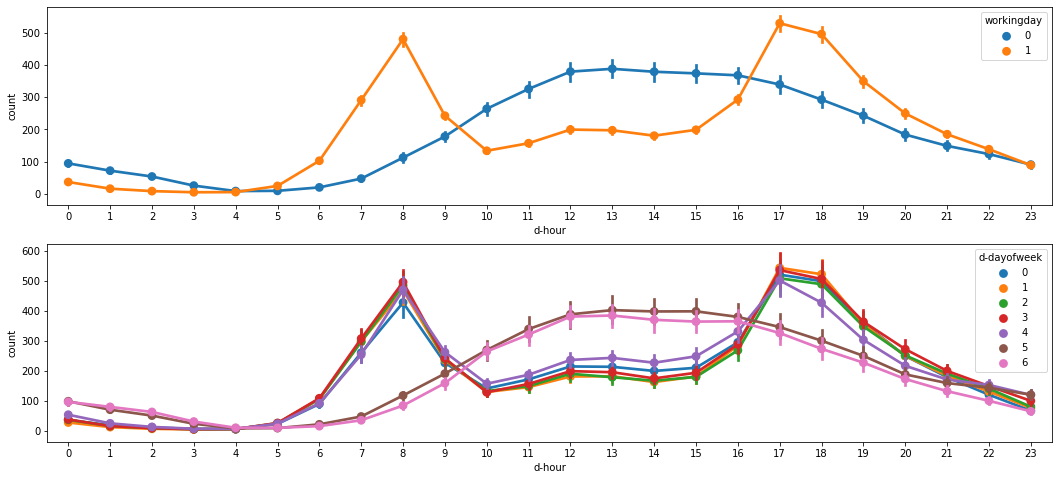

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="d-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="d-hour", y="count", hue="d-dayofweek", ax=ax2)

#### generating a new feature by combining year and month

In [ ]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["d-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "d-year_month"]].head()

(10886, 20)


,datetime,d-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


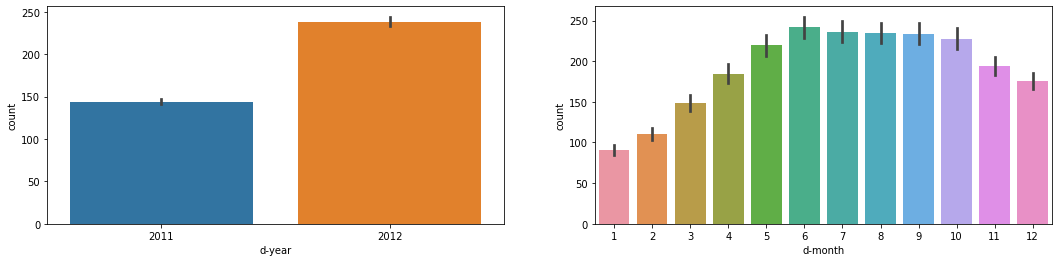

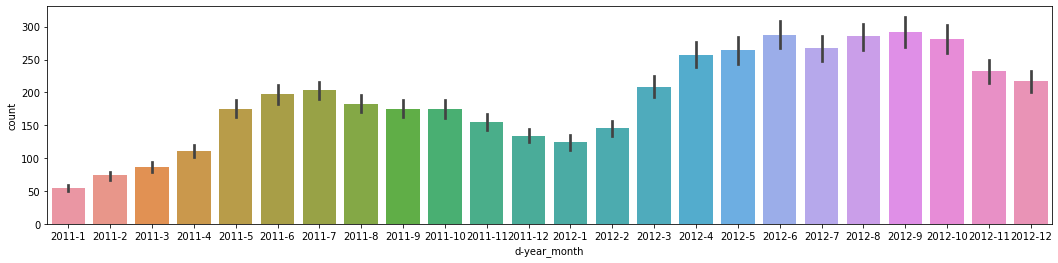

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year_month", y="count", ax=ax3)

#### select features to use for training

In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'd-year', 'd-month', 'd-day', 'd-hour', 'd-minute', 'd-second',
       'd-dayofweek', 'd-year_month'],
      dtype='object')

In [ ]:
features = ["season", "holiday", "workingday", "weather",
            "temp", "atemp", "humidity", "windspeed",
            "d-year", "d-hour", "d-dayofweek"]

In [ ]:
X = train[features]
y = train['count']
print(X.shape, y.shape)
X.head()

(10886, 11) (10886,)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,d-year,d-hour,d-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


#### A simple prediction model

In [ ]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators= 30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9483758264489849

In [ ]:
list(zip(y_test, model.predict(X_test)))[:10]

[(6, 7.066666666666666),
 (42, 47.8),
 (610, 527.7666666666667),
 (16, 18.733333333333334),
 (70, 79.9),
 (14, 25.433333333333334),
 (415, 369.7),
 (232, 225.6),
 (237, 330.1666666666667),
 (290, 278.3)]

In [ ]:
from sklearn.metrics import mean_squared_error
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, np.log(1+y), test_size = 0.2)   # y -> log(1 + y)

model = RandomForestRegressor(n_estimators= 30)
model.fit(X_train, y_train)
print("score: ", model.score(X_test, y_test))
print("MSE: ", mean_squared_error(y_test, model.predict(X_test)))

score:  0.9580883210969734
MSE:  0.08353623971542504


- we can see that log(1+y) gives better performance than y.

In [ ]:
list(zip(y_test, model.predict(X_test)))[:10]

[(1.9459101490553132, 2.0403146519508772),
 (3.7612001156935624, 3.7669927593559467),
 (6.415096959171596, 6.302535786676932),
 (2.833213344056216, 2.824032746730312),
 (4.2626798770413155, 4.443539522423507),
 (2.70805020110221, 3.2117684044501233),
 (6.030685260261263, 5.914215047904423),
 (5.4510384535657, 5.41472429655433),
 (5.472270673671475, 5.697741213725065),
 (5.673323267171493, 5.595541299114385)]

In [ ]:
X_train[:5]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,d-year,d-hour,d-dayofweek
7560,2,0,1,3,22.14,25.760,88,19.0012,2012,9,0
8090,2,0,0,1,25.42,31.060,57,7.0015,2012,11,6
30,1,0,0,2,16.40,20.455,76,12.9980,2011,7,6
7290,2,0,1,2,18.86,22.725,88,0.0000,2012,3,3
8665,3,0,1,2,32.80,37.120,52,12.9980,2012,10,4


#### Let's see other models: linear and decision tree models

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.47259501985061175
0.915749021768606


#### change the performance score (rmse --> rmsle)
- robust to outliers
- RMSLE incurs a larger penalty for the underestimation of the Actual variable than the Overestimation.
- This is especially useful for business cases where the underestimation of the target variable is not acceptable but overestimation can be tolerated.
- to be used in GridSearch() (The less, the better.)
- $$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [ ]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    predict = np.log(predict + 1)
    actual = np.log(actual + 1)
    
    difference_square_mean = np.square(predict - actual).mean()
    score = np.sqrt(difference_square_mean)
    return score

rmsle_scorer = make_scorer(rmsle)    #  make your own scoring function
rmsle_scorer

make_scorer(rmsle)

## selecting hyperparameters
- Grid search
- Random search

##### Grid search

In [ ]:
# Grid Search for the random forest

n_estimators = 30

max_depth_list = [10, 20, 30, 50, 100]
max_features_list = [0.1, 0.3, 0.5, 0.7,  0.9]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      random_state=11,
                                      n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, cv=5,
                                scoring=rmsle_scorer).mean()

        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })

        print("Score = {0:.5f}".format(score))

hyperparameters_list

Score = 0.16951
Score = 0.12306
Score = 0.09950
Score = 0.09258
Score = 0.08983
Score = 0.14066
Score = 0.10606
Score = 0.09078
Score = 0.08726
Score = 0.08667
Score = 0.14091
Score = 0.10716
Score = 0.09140
Score = 0.08776
Score = 0.08699
Score = 0.14081
Score = 0.10713
Score = 0.09136
Score = 0.08784
Score = 0.08697
Score = 0.14081
Score = 0.10713
Score = 0.09136
Score = 0.08784
Score = 0.08697


[{'score': 0.16950633165191492,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.1},
 {'score': 0.12306276038916239,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.3},
 {'score': 0.09949546271969718,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.5},
 {'score': 0.0925814502854659,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.7},
 {'score': 0.08982572027937767,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.9},
 {'score': 0.14065919256437312,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.1},
 {'score': 0.10606278664903024,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.3},
 {'score': 0.09078184215554591,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.5},
 {'score': 0.08726420623588686,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.7},
 {'score': 0.08666639731103369,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.9},
 {'score': 0.1409055682727031,


In [ ]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)  # make dataframe from dictionary
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

(25, 4)


,score,n_estimators,max_depth,max_features
9,0.086666,30,20,0.9
24,0.086969,30,100,0.9
19,0.086969,30,50,0.9
14,0.086988,30,30,0.9
8,0.087264,30,20,0.7


##### Random search
- 2 stages: random selection and fine tuning

In [ ]:
# Random selection

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.08761
Score = 0.10727
Score = 0.08661
Score = 0.08892
Score = 0.09846
Score = 0.08892
Score = 0.08661
Score = 0.08671
Score = 0.09112
Score = 0.08892
(10, 4)


,score,n_estimators,max_depth,max_features
6,0.086608,30,91,0.904707
2,0.086614,30,26,0.908559
7,0.086712,30,79,0.981396
0,0.087610,30,31,0.725240
3,0.088916,30,84,0.577577


In [ ]:
X_train.shape

(8708, 11)

In [ ]:
# fine search

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=30, high=90)
    max_features = np.random.uniform(low=0.5, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list

Score = 0.08671
Score = 0.08761
Score = 0.08671
Score = 0.08708
Score = 0.08760
Score = 0.08760
Score = 0.08708
Score = 0.08761
Score = 0.08708
Score = 0.08671
(10, 4)


,score,n_estimators,max_depth,max_features
0,0.086712,30,65,0.930974
9,0.086712,30,51,0.924424
2,0.086712,30,66,0.941507
3,0.087076,30,35,0.778681
6,0.087076,30,74,0.742654
8,0.087076,30,44,0.747706
4,0.087604,30,65,0.724229
5,0.087604,30,88,0.693426
1,0.087610,30,31,0.680100
7,0.087610,30,31,0.677956


In [ ]:
# final selection of hyperparameters (최종모델 선택)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300,
                              max_depth=65,
                              max_features=0.9309,
                              random_state=37,
                              n_jobs=-1)
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, cv=5,
                        scoring=rmsle_scorer).mean()
print("Score = {0:.5f}".format(score))

Score = 0.08490


#### Most significant features

In [ ]:
model.feature_importances_    # he higher, the more important the feature.

array([0.02899721, 0.00159625, 0.03754561, 0.01084869, 0.05063554,
       0.02838283, 0.02159215, 0.01110294, 0.03009873, 0.75053236,
       0.0286677 ])

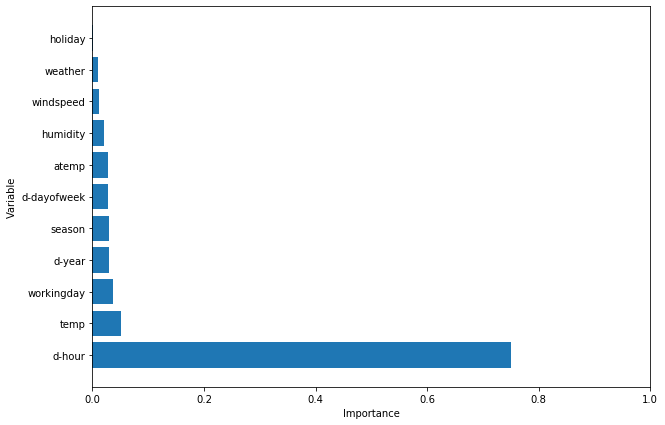

In [ ]:
df = pd.DataFrame({'feature':features,'importance':model.feature_importances_ }) 
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

In [ ]:
## GridSearchCV() function

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 11) (2178, 11) (8708,) (2178,)


In [ ]:
rcf = RandomForestRegressor(n_estimators=100)
rcf.fit(X_train, y_train)
rcf.score(X_test, y_test)

0.9589764387583691

# GridSearchCV()
- Exhaustive search over specified parameter values for an estimator.
- it implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, 
 “transform” and “inverse_transform” if they are implemented in the estimator used.
- The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
- 그리드 탐색과 교차 검증을 동시에 수행

In [ ]:
from sklearn.model_selection import GridSearchCV

params = [{"max_depth":[10, 20, 30], 
           "max_features":[0.3, 0.5, 0.9]}]

# grid search
clf = GridSearchCV(RandomForestRegressor(), params, cv=3, n_jobs=-1)
clf.fit(X_train, y_train)
print("best values: ", clf.best_estimator_)
print("best score: ", clf.best_score_)

# final evaluation on test data
score = clf.score(X_test, y_test)
print("final score: ", score)

best values:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
best score:  0.9465821596991585
final score:  0.9592613021244976


# RandomizedSearchCV() function
- In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number 
of parameter settings is sampled from the specified distributions. The number of parameter settings
that are tried is given by n_iter.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomizedSearchCV(RandomForestRegressor(), random_grid, 
                               cv = 3, n_jobs = -1)
# Fit the random search model
rf.fit(X_train, y_train)

print(rf.best_params_, rf.best_estimator_, rf.best_score_)
score = rf.score(X_test, y_test)
print(score)

{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True} RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 0.9428010134902728
0.9572643951898312
